# 미분방정식

### 문제.	다음과 같은 차분방정식(difference equation)의 해를 구하여라.
### y[k+1]-2y[k]=0,y[0]=1


In [ ]:
from sympy import symbols,Function,dsolve,Eq

# 변수 및 함수 정의
t = symbols('t')        # 독립 변수
y = Function('y')(t)   # 종속 변수

# 미분 방정식 정의
eq = Eq(y.diff(t), -0.2 * y)

# 초기 조건 정의
initial_condition = {y.subs(t, 0): 10}

# 미분 방정식 풀이
dsolve(eq, y, ics=initial_condition)

Eq(y(t), 10*exp(-0.2*t))

### 	다음과 같은 미분방정식(differential equation)의 해를 구하여라.
### $$y'' (t)-5y' (t)+6y(t)=0,y(0)=0,y(1)=e^2-e^3$$

In [ ]:
from sympy import exp

# 변수 및 함수 정의
t = symbols('t')        # 독립 변수
y = Function('y')(t)   # 종속 변수

# 미분 방정식 정의
eq = Eq(y.diff(t,2)-5*y.diff(t)+6*y,0)

# 초기 조건 정의
initial_condition = {y.subs(t, 0): 0,y.subs(t,1):exp(2)-exp(3)}

# 미분 방정식 풀이
dsolve(eq, y, ics=initial_condition)

Eq(y(t), (1 - exp(t))*exp(2*t))

### 	다음과 같은 미분방정식(differential equation)의 해를 구하여라.
### $$y'' (t)+4y(t)=0,y(0)=0,y'(0)=i $$

In [ ]:
from sympy import I
# 변수 및 함수 정의
t = symbols('t')        # 독립 변수
y = Function('y')(t)   # 종속 변수

# 미분 방정식 정의
eq = Eq(y.diff(t,2)+4*y,0)

# 초기 조건 정의
initial_condition = {y.subs(t, 0): 0,y.diff(t).subs(t,0):I}

# 미분 방정식 풀이
dsolve(eq, y, ics=initial_condition)

Eq(y(t), I*sin(2*t)/2)

### 	다음과 같은 미분방정식(differential equation)의 해를 구하여라.
### $$y'' (t)+3y'(t)+2y(t)=0,y(0)=0,y'(0)=0 $$

In [ ]:
from sympy import symbols, Function, Eq, dsolve,exp

# 변수 및 함수 정의
t = symbols('t')        # 독립 변수
y = Function('y')(t)   # 종속 변수

# 미분 방정식 정의
eq = Eq(y.diff(t,2)+3*y.diff(t)+2*y-exp(t),0)

# 초기 조건 정의
initial_condition = {y.subs(t, 0): -5/6,y.diff(t).subs(t,0):1/6}

# 미분 방정식 풀이
dsolve(eq, y, ics=initial_condition)

Eq(y(t), exp(t)/6 - 2.0*exp(-t) + 1.0*exp(-2*t))

### 	다음과 같은 미분방정식(differential equation)의 해를 구하여라.
### $$y'' (t)+4/t y'(t) + 2/t^2 y(t)=0,y(0)=0,y'(0)=-0.02 $$

In [ ]:
# 변수 및 함수 정의
t = symbols('t')        # 독립 변수
y = Function('y')(t)   # 종속 변수

# 미분 방정식 정의
eq = Eq(y.diff(t,2)+(4/t)*y.diff(t)+(2/t**2)*y,0)

# 초기 조건 정의
initial_condition = {y.subs(t, 0): 0,y.diff(t).subs(t,0):-0.02}

# 미분 방정식 풀이
dsolve(eq, y, ics=initial_condition)

False

# **Finite Difference Method**

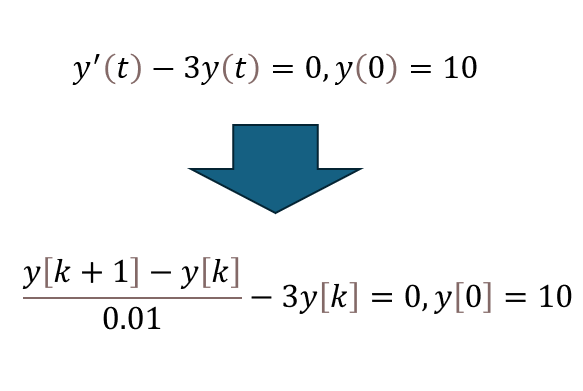

In [8]:
from sympy import Eq, symbols,rsolve,Function

k=symbols('k',integer=True)
y=Function('y')

h=0.01
# 차분 방정식 정의
diff_eq = Eq((y(k+1)-y(k))/h-3*y(k), 0)

# 초기 조건 추가(딕셔너리 자료형)
init_conditions = {y(0): 10}

# 해 구하기
solution = rsolve(diff_eq, y(k),init_conditions)
solution

10*1.03**k

Text(0.5, 1.0, 'h=0.01')

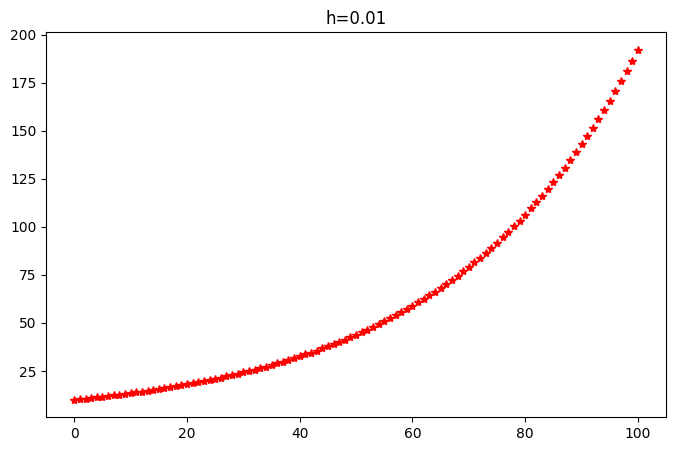

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# k 값 범위 설정
k_values = np.arange(101) # 0부터 100까지 숫자 설정
y_disc = [solution.subs(k, val).evalf() for val in k_values]

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(k_values, y_disc,'*r')
plt.title('h=0.01')


문제. 아래 미분방정식(difference equation)을 해의 그래프를 FDM을 이용하여 구하여 보아라.
$$ 𝑦″(𝑡)+ 4/𝑡 𝑦′(𝑡)+2/𝑡2𝑦(𝑡)=0,𝑦(0)=10,𝑦′(0)=−0.02,0≤𝑡≤1 $$

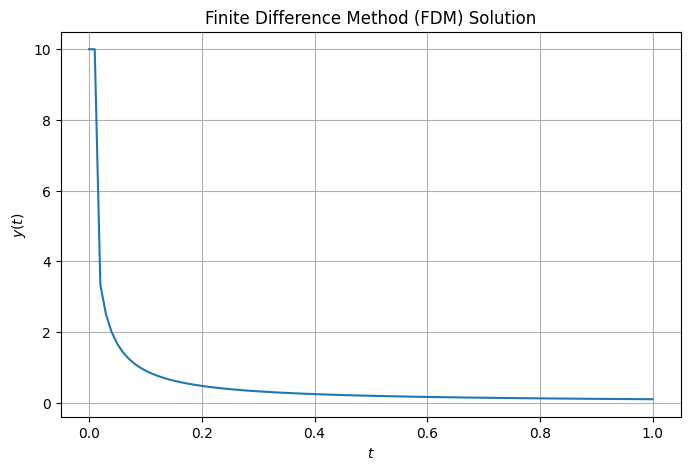

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 초기 조건 및 범위 설정
t_min, t_max, N = 0, 1, 100  # 시간 범위와 스텝 개수
h = (t_max - t_min) / N  # 스텝 크기
t_values = np.linspace(t_min, t_max, N+1)  # 시간 노드 생성

# 초기 조건
y = np.zeros(N+1)
y[0]=10
y[1]=y[0]-0.02*h

# FDM을 이용한 수치적 풀이
for k in range(1, N):
    y[k+1]=(1/(1+2/k))*((2-2/k**2)*y[k]+(-1+2/k)*y[k-1])

# 그래프 출력
plt.figure(figsize=(8, 5))
plt.plot(t_values, y,label=r'$y(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.title('Finite Difference Method (FDM) Solution')
plt.grid()
plt.show()

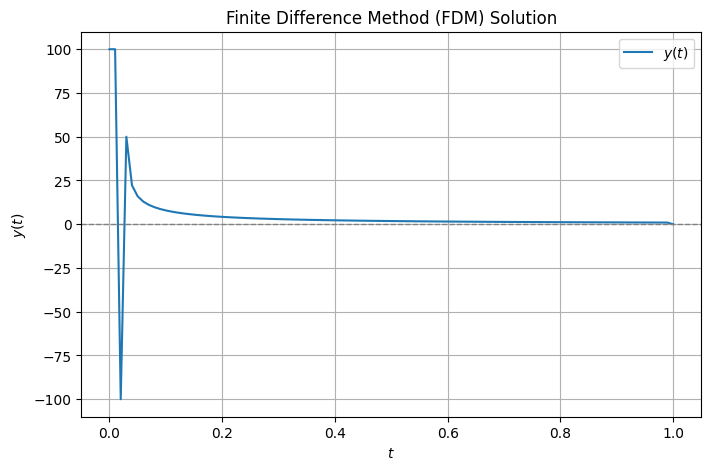

In [12]:
# FDM의 또다른 방법
import numpy as np
import matplotlib.pyplot as plt

# 초기 조건 및 범위 설정
t_min, t_max, N = 0, 1, 100  # 시간 범위와 스텝 개수
h = (t_max - t_min) / N  # 스텝 크기
t_values = np.linspace(t_min, t_max, N+1)  # 시간 노드 생성

# 초기 조건
y = np.zeros(N+1)
yp = np.zeros(N+1)
y[0] = 100  # y(0) = 10
yp[0] = -0.02  # y'(0) = -0.02

# FDM을 이용한 수치적 풀이 (두 번째 차분식 사용)
for i in range(1, N):
    t = t_values[i]

    if t == 0:
        continue  # t=0일 때 나눗셈 방지

    # 이차 미분 방정식을 전진 차분법(Finite Difference Method)으로 변환
    ypp = - (4/t) * yp[i-1] - (2/t**2) * y[i-1]  # y''(t)의 근사
    y[i] = y[i-1] + h * yp[i-1]  # y_n+1 = y_n + h*y'_n
    yp[i] = yp[i-1] + h * ypp  # y'_n+1 = y'_n + h*y''_n

# 그래프 출력
plt.figure(figsize=(8, 5))
plt.plot(t_values, y, label=r'$y(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.title('Finite Difference Method (FDM) Solution')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.legend()
plt.grid()
plt.show()


# **Taylor Expansion과 Euler Forumula**

###	아래 함수 f(x)를 x=0에서 x의 다항식으로 표현하고 그래프로 그려보아라.   
### $$ f(x) = \cos⁡(2x) $$

In [13]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
f = sp.cos(2*x)

# 테일러 급수 전개 (x=0에서 8차항까지)
f.series(x, 0, 9)

1 - 2*x**2 + 2*x**4/3 - 4*x**6/45 + 2*x**8/315 + O(x**9)

In [14]:
# O() 이하 제거
f.series(x, 0, 9).removeO()

2*x**8/315 - 4*x**6/45 + 2*x**4/3 - 2*x**2 + 1

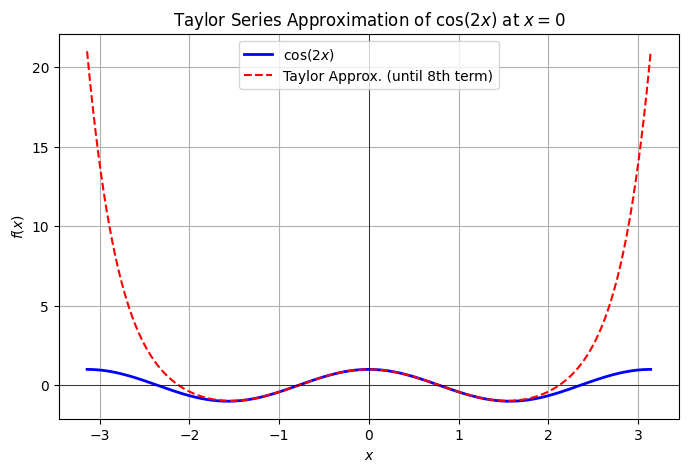

In [17]:
# 수치적으로 계산하여 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt

taylor_series=f.series(x, 0, 9).removeO()

# x 값 설정 (-π to π)
x_vals = np.linspace(-np.pi, np.pi, 400)
f_vals = np.cos(2 * x_vals)  # 원래 함수 값
taylor_func = sp.lambdify(x, taylor_series, 'numpy')  # 테일러 다항식 변환
taylor_vals = taylor_func(x_vals)  # 테일러 다항식 값

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_vals, label=r'$\cos(2x)$', linewidth=2, color='blue')
plt.plot(x_vals, taylor_vals, label='Taylor Approx. (until 8th term)',
         linestyle='dashed', color='red')

# 그래프 설정
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title(r'Taylor Series Approximation of $\cos(2x)$ at $x=0$')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid(True)

# 그래프 출력
plt.show()

###	테일러급수를 이용하여 아래 오일러 공식(Euler’s Formula)을 증명하여라
### $$ e^{iθ} = \cos⁡(θ)+i \sin⁡(θ) $$

In [18]:
from sympy import symbols, I, exp, cos, sin

# cos 함수의 테일러 급수
theta=symbols('θ')
f_cos=cos(theta).series(theta,0)
f_cos

1 - θ**2/2 + θ**4/24 + O(θ**6)

In [19]:
# sin 함수의 테일러 급수
f_sin=sin(theta).series(theta,0)
f_sin

θ - θ**3/6 + θ**5/120 + O(θ**6)

In [20]:
# exp 함수의 테일러 급수
f_exp=exp(theta*I).series(theta,0)
f_exp

1 + I*θ - θ**2/2 - I*θ**3/6 + θ**4/24 + I*θ**5/120 + O(θ**6)

In [21]:
# exp(it) - (cos(t)+i sin(t)) = 0 ?
f_exp-(f_cos+I*f_sin).simplify()

O(θ**6)

In [22]:
# 미분방정식을 이용한 증명
from sympy import diff
z=cos(theta)+I*sin(theta)
diff(z,theta)

-sin(θ) + I*cos(θ)

In [23]:
# 변수 및 함수 정의
from sympy import Function,Eq,dsolve
theta=symbols('θ')
z=Function('z')(theta)

# 미분방정식 정의
eq=Eq(z.diff(theta)-I*z,0)

# 초기조건
IC={z.subs(theta,0):1}

# 해구하기
dsolve(eq,z,ics=IC)

Eq(z(θ), exp(I*θ))